###### from sqlalchemy import create_engine
import psycopg2
import pandas as pd
from IPython.display import SVG
#from configparser import ConfigParser
import logging as lg
import configparser       
#import ipython 

 

In [11]:
#import configparser
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
from IPython.display import SVG
from configparser import ConfigParser
import logging as lg
#import configparser       
#import ipython 
#connect to database
 
parser = ConfigParser()
_ = parser.read('jupt_conf.cfg')
POSTGRES_ADDRESS  = parser.get('chem_25', 'POSTGRES_ADDRESS')
conn = parser.get('chem_25_conn_string', 'conn_string')
try: 
    cnx = create_engine(conn)
    conn = cnx.connect()
    df = pd.read_sql_query('''SELECT * FROM rdk.mols LIMIT 5;''', conn)
except Exception as error:
    lg.error("**UNABLE TO CONNECT TO DATABASE")
    lg.error(error)   
finally:
    conn.close()
    
df.head()

,molregno,m
0,14463,FC(F)(F)c1cccc(N2CCN(c3ccc(-c4ncns4)nn3)CC2)c1
1,14464,Cc1nsc(-c2ccnc(N3CCN(c4cccc(C(F)(F)F)c4)CC3)n2)n1
2,14470,CC(C)CCn1c(Cn2c(=O)n(C(N)=O)c3ccccc32)nc2ccccc21
3,14471,CCOC(=O)n1c(=O)n(Cc2nc3ccccc3n2CCC(C)C)c2ccccc21
4,14472,CC[C@H](C)[C@H](NC(=O)OC(C)(C)C)C(=O)N[C@@H](C...


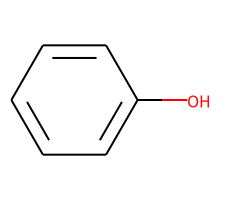

In [12]:
df= pd.read_sql_query(('''select mol_to_svg('Oc1ccccc1') as svg'''),cnx)
SVG(df['svg'][0])

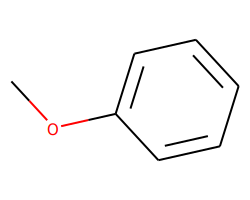

In [4]:
df= pd.read_sql_query(('''select mol_to_svg('COc1ccccc1') as svg'''),cnx)
SVG(df['svg'][0])

# 1. substructure

In [20]:

#df= pd.read_sql_query(('''select count(*) as total from rdk.mols where substruct ( mol_from_smiles('Cc1cc(ccc1C(=O)c2ccccc2Cl)N3N=CC(=O)NC3=O'), m) ; '''),cnx)
#df.head();

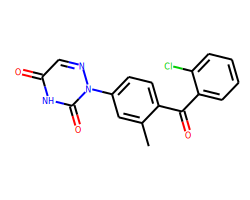

In [6]:
#search substructure sample 1
#select * from rdk.mols where substruct ( mol_from_smiles('C1=CC=CC=C1OC'), m) limit 3;
#sample chemical Cc1cc(ccc1C(=O)c2ccccc2Cl)N3N=CC(=O)NC3=O search it's substrducher in sql 
##select * from rdk.mols where substruct ( mol_from_smiles('Cc1cc(ccc1C(=O)c2ccccc2Cl)N3N=CC(=O)NC3=O'), m) ;
##--43 rows affected.
df= pd.read_sql_query(('''select mol_to_svg('Cc1cc(ccc1C(=O)c2ccccc2Cl)N3N=CC(=O)NC3=O') as svg'''),cnx)
SVG(df['svg'][0])

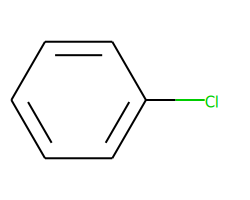

In [39]:
#display the structure 
df= pd.read_sql_query(('''select mol_to_svg(m) as svg from rdk.mols where substruct ( mol_from_smiles('Cc1cc(ccc1C(=O)c2ccccc2Cl)N3N=CC(=O)NC3=O'), m) limit 5;'''),cnx)
SVG(df['svg'][0])


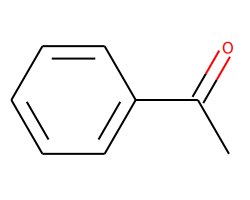

In [40]:
SVG(df['svg'][1])

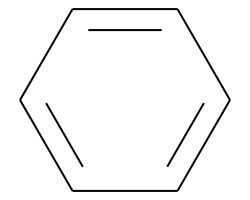

In [41]:
SVG(df['svg'][2])

# 2. simularate of O=c1[nH]cc(F)c(=O)[nH]1

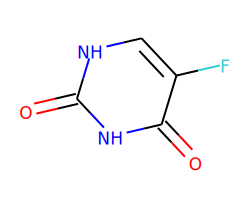

In [21]:
#
df= pd.read_sql_query(('''select mol_to_svg(mol_from_smiles('O=c1[nH]cc(F)c(=O)[nH]1')) as svg'''),cnx)
SVG(df['svg'][0])

In [10]:
#by run simularative we found :
#O=c1[nH]cc(I)c(=O)[nH]1 #"O=c1[nH]cc(F)c(=O)[nH]1" #"O=c1[nH]cc(I)c(=O)[nH]1" #"O=c1[nH]cc(C(F)(F)F)c(=O)[nH]1"
#"Cc1c[nH]c(=O)[nH]c1=O" #"Nc1c[nH]c(=O)[nH]c1=O" #"O=c1[nH]cc(Br)c(=O)[nH]1" 
df = pd.read_sql_query(('''select * from get_mfp2_neighbors('O=c1[nH]cc(F)c(=O)[nH]1')'''), cnx)
df.head()



,molregno,m,similarity
0,368538,O=c1[nH]cc(F)c(=O)[nH]1,1.00
1,108041,Cc1c[nH]c(=O)[nH]c1=O,0.52
2,191581,O=c1[nH]cc(I)c(=O)[nH]1,0.52
3,242096,O=c1[nH]cc(Br)c(=O)[nH]1,0.52
4,699054,Nc1c[nH]c(=O)[nH]c1=O,0.52


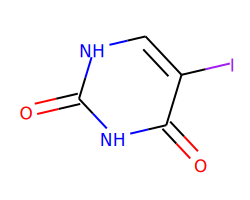

In [53]:
#Try each mol by replace the mol 
df= pd.read_sql_query(('''select mol_to_svg(mol_from_smiles('O=c1[nH]cc(I)c(=O)[nH]1')) as svg'''),cnx)
SVG(df['svg'][0])


# simularate of Bisphenol A

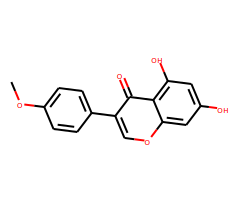

In [24]:
#Bisphenol A 491-80-5 mol=COc1ccc(-c2coc3cc(O)cc(O)c3c2=O)cc1
#Bisphenol B 77-40-7 mol=CCC(C)(c1ccc(O)cc1)c1ccc(O)cc1
df= pd.read_sql_query(('''select mol_to_svg(mol_from_smiles('COc1ccc(-c2coc3cc(O)cc(O)c3c2=O)cc1')) as svg'''),cnx)
SVG(df['svg'][0])


In [25]:
df = pd.read_sql_query(('''select * from get_mfp2_neighbors('COc1ccc(-c2coc3cc(O)cc(O)c3c2=O)cc1');'''), cnx)
df.head()

,molregno,m,similarity
0,220354,COc1ccc(-c2coc3cc(O)cc(O)c3c2=O)cc1,1.000000
1,464962,COc1ccc(-c2coc3cc(OC)cc(O)c3c2=O)cc1,0.871795
2,422998,COc1ccc(-c2coc3cc(O)cc(O)c3c2=O)c(O)c1,0.804878
3,461633,COc1cc(O)c2c(=O)c(-c3ccc(O)cc3)coc2c1,0.780488
4,2093698,COc1ccc(-c2coc3c(c(O)cc4occ(-c5ccc(OC)cc5)c(=O...,0.761905


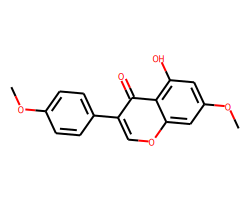

In [26]:
#Test the simularate:
df= pd.read_sql_query(('''select mol_to_svg(mol_from_smiles('COc1ccc(-c2coc3cc(OC)cc(O)c3c2=O)cc1')) as svg'''),cnx)
SVG(df['svg'][0])


# substructure of Bisphenol A

In [31]:
df= pd.read_sql_query(('''select * from rdk.mols where substruct ( mol_from_smiles('COc1ccc(-c2coc3cc(O)cc(O)c3c2=O)cc1'), m)'''),cnx)
df.head()

,molregno,m
0,16832,c1ccccc1
1,16791,Cc1ccccc1
2,16895,COc1ccccc1
3,16995,Cc1ccc(O)cc1
4,32978,Oc1cccc(O)c1


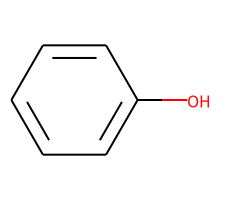

In [30]:
df= pd.read_sql_query(('''select mol_to_svg(m) as svg from rdk.mols where substruct ( mol_from_smiles('COc1ccc(-c2coc3cc(O)cc(O)c3c2=O)cc1'), m) limit 3;'''),cnx)
#df.head()
SVG(df['svg'][0])

"O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12"
"O=c1c(-c2ccc(O)cc2)coc2cc(O)ccc12"
"O=c1ccoc2ccccc12"
"Oc1ccccc1"
"CO"
"c1ccccc1"
"Cc1ccccc1"

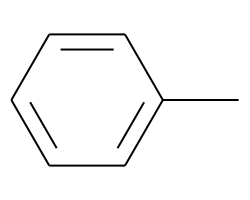

In [35]:
df= pd.read_sql_query(('''select mol_to_svg(mol_from_smiles('Cc1ccccc1')) as svg'''),cnx)
SVG(df['svg'][0])

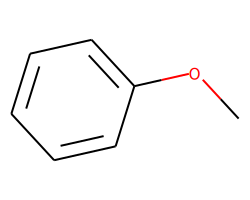

In [12]:
#We have a smile string as C1=CC=CC=C1OC
#looking for substructs for 1.8 million chemicals in the database
df= pd.read_sql_query(('''select mol_to_svg(mol_from_smiles('C1=CC=CC=C1OC')) as svg'''),cnx)
SVG(df['svg'][0])

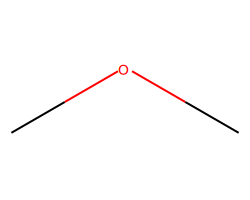

In [45]:
#another substructure sample
df= pd.read_sql_query(('''select mol_to_svg(m) as svg from rdk.mols where substruct ( mol_from_smiles('C1=CC=CC=C1OC'), m) limit 3;'''),cnx)
SVG(df['svg'][0])

# 3. m@>'c1c[nH]nn1'

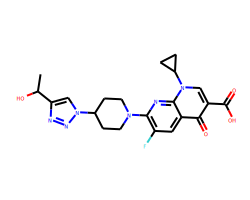

In [6]:
molsvg = pd.read_sql_query('''select mol_to_svg(m) as svg from rdk.mols where m@>'c1c[nH]nn1'::mol limit 10;''', cnx)
SVG(molsvg['svg'][0])

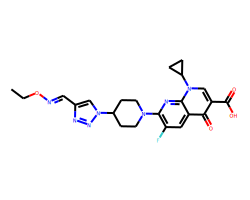

In [50]:
SVG(molsvg['svg'][1])

In [5]:
mysvg = pd.read_sql_query(('''select mol_to_svg(m) as svg from rdk.mols LIMIT 5;'''), cnx)
dfl = pd.DataFrame(mysvg)
type(dfl)
#mysvg['svg'][0]

pandas.core.frame.DataFrame

In [ ]:
SVG(mysvg['svg'][0])

In [ ]:
SVG(mysvg['svg'][1])

In [ ]:
SVG(mysvg['svg'][2])

In [ ]:
SVG(mysvg['svg'][3])

In [4]:
#simple query to db and fetch 5 rows make sure database has been connected 
pd.read_sql_query('''SELECT * FROM rdk.mols LIMIT 5;''', cnx)

,molregno,m
0,14463,FC(F)(F)c1cccc(N2CCN(c3ccc(-c4ncns4)nn3)CC2)c1
1,14464,Cc1nsc(-c2ccnc(N3CCN(c4cccc(C(F)(F)F)c4)CC3)n2)n1
2,14470,CC(C)CCn1c(Cn2c(=O)n(C(N)=O)c3ccccc32)nc2ccccc21
3,14471,CCOC(=O)n1c(=O)n(Cc2nc3ccccc3n2CCC(C)C)c2ccccc21
4,14472,CC[C@H](C)[C@H](NC(=O)OC(C)(C)C)C(=O)N[C@@H](C...
